In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
est_df = pd.read_csv('estimation.csv', index_col=0)
est_df.head()

,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Sem7,Sem8,Year
2021_01,66.50,73.33,79.7,70.67,70.50,74.43,71.29,72.00,2021
2021_02,82.63,84.11,93.1,81.89,81.63,68.00,76.00,70.00,2021
2021_03,86.25,87.89,91.2,92.00,96.00,92.57,94.57,85.50,2021
2021_04,76.63,79.56,77.9,85.44,83.13,82.57,71.86,73.00,2021
2021_05,77.50,78.89,74.5,79.33,83.13,77.71,70.29,70.25,2021


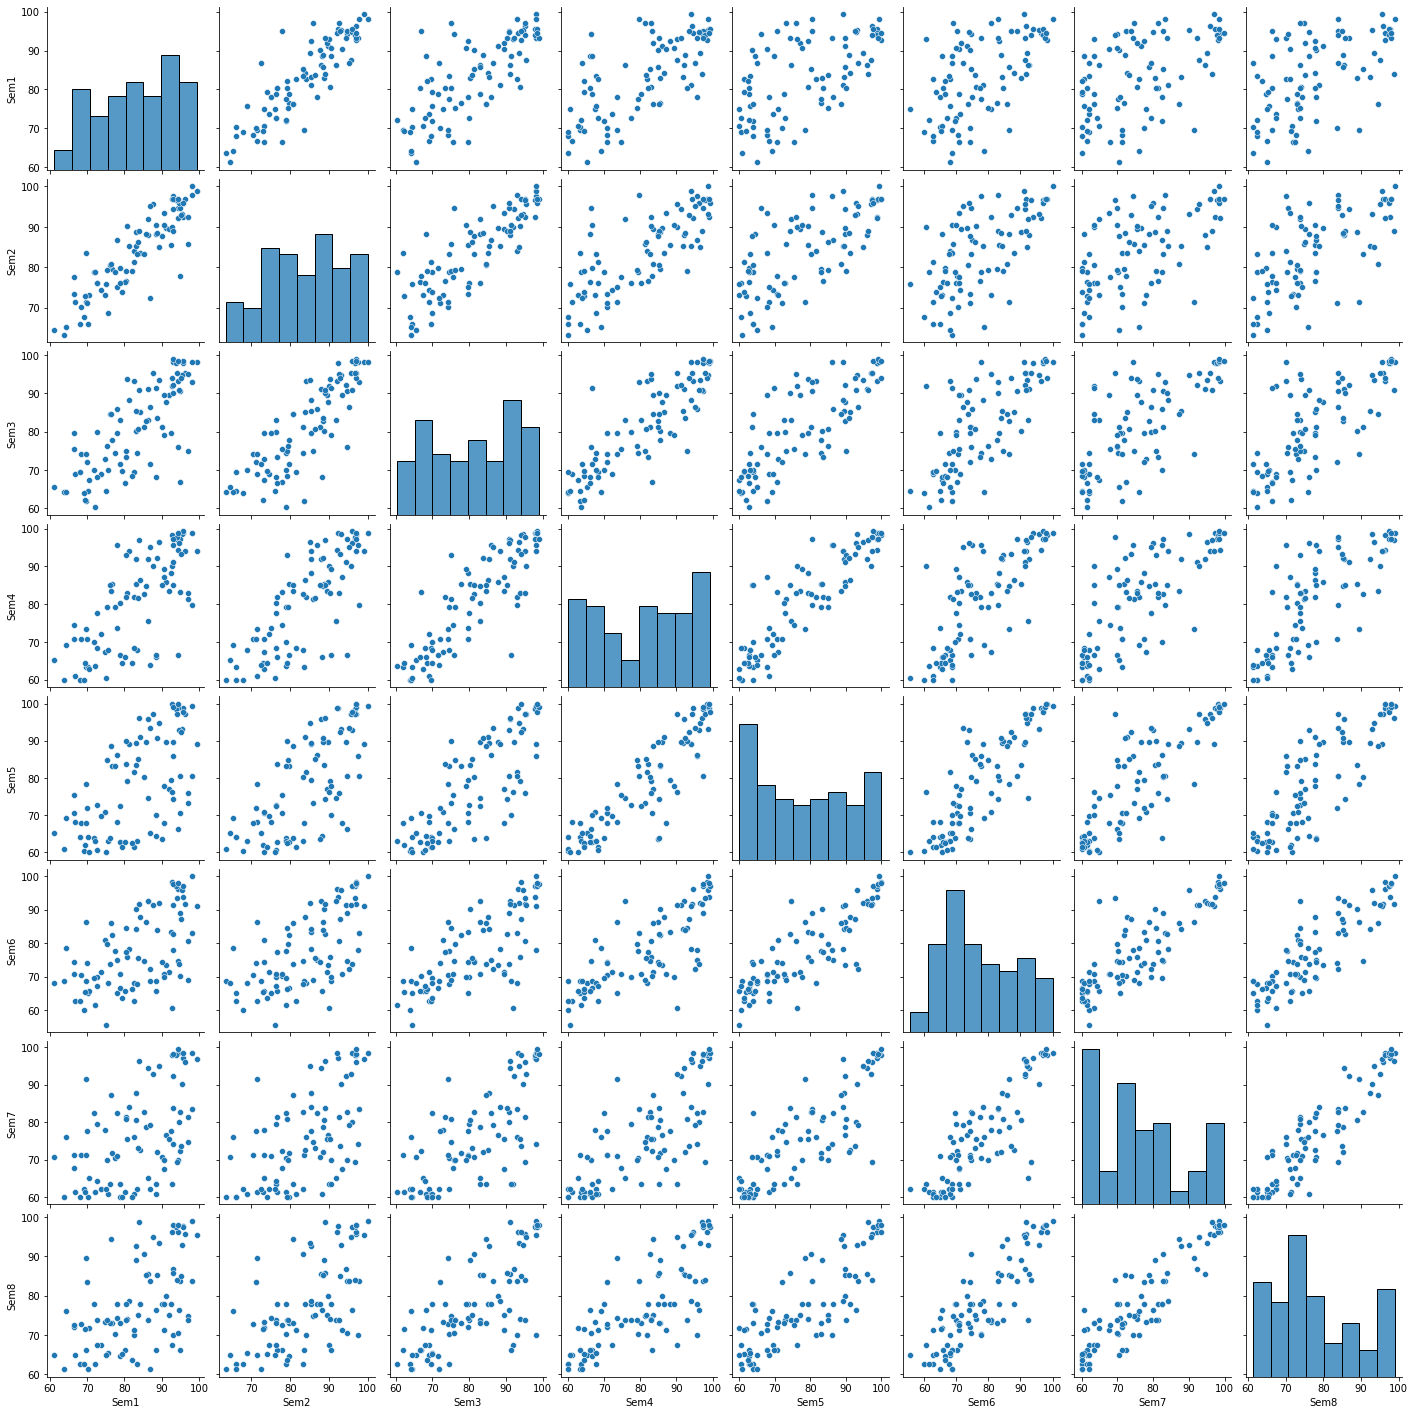

In [3]:
est_for_corr = est_df.drop('Year', axis=1)
sns.pairplot(est_for_corr)

<AxesSubplot:>

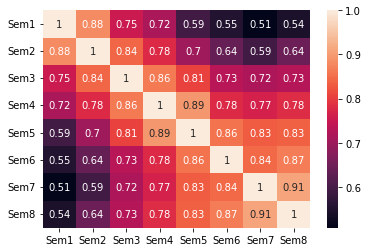

In [4]:
corr = est_for_corr.corr()
sns.heatmap(corr, annot = True)

## Clustering

In [5]:
from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler

X = est_for_corr.values[:,1:]
# Clus_dataSet = StandardScaler().fit_transform(X)

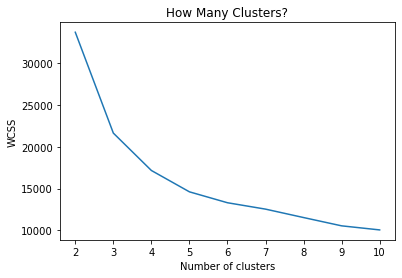

In [6]:
wcss = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, 
                    n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(2, 11), wcss)
plt.title('How Many Clusters?')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
clasterNum = 4
k_means = KMeans(init="k-means++", n_clusters=clasterNum, n_init=10)
k_means.fit(X)
labels = k_means.labels_

est_for_corr['Class'] = labels
clusters = est_for_corr.groupby('Class')
clusters.mean()

,Sem1,Sem2,Sem3,Sem4,Sem5,Sem6,Sem7,Sem8
Class,,,,,,,,
0,93.074375,94.302500,95.543750,96.061250,96.627500,94.740625,96.304375,95.250000
1,73.872500,73.885833,67.470833,65.013333,63.695833,66.130833,63.213750,66.458333
2,81.493846,81.930000,79.657692,78.529615,74.103077,73.807308,72.368462,73.980769
3,88.070909,89.422273,87.604545,89.565455,86.371818,81.987727,79.422273,81.954545


In [ ]:
est_for_corr.to_cvs()

## Classification

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
X = est_for_corr.drop('Class', axis = 1)
y = est_for_corr['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [11]:
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

In [13]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0


In [16]:
X = est_for_corr.drop(['Class','Sem8'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9090909090909091
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.83      0.91         6
           2       0.83      0.83      0.83         6
           3       0.86      1.00      0.92         6

    accuracy                           0.91        22
   macro avg       0.92      0.92      0.92        22
weighted avg       0.92      0.91      0.91        22



In [17]:
X = est_for_corr.drop(['Class','Sem8', 'Sem7'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8636363636363636
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       0.67      1.00      0.80         6
           2       1.00      0.57      0.73         7
           3       1.00      1.00      1.00         5

    accuracy                           0.86        22
   macro avg       0.92      0.89      0.88        22
weighted avg       0.91      0.86      0.86        22



In [18]:
X = est_for_corr.drop(['Class','Sem8', 'Sem7', 'Sem6'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7272727272727273
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.83      0.83      0.83         6
           2       0.62      0.71      0.67         7
           3       0.67      0.40      0.50         5

    accuracy                           0.73        22
   macro avg       0.73      0.74      0.72        22
weighted avg       0.72      0.73      0.71        22



In [19]:
X = est_for_corr.drop(['Class','Sem8', 'Sem7', 'Sem6', 'Sem5'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.6818181818181818
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.86      1.00      0.92         6
           2       0.50      0.67      0.57         6
           3       0.75      0.50      0.60         6

    accuracy                           0.68        22
   macro avg       0.69      0.67      0.67        22
weighted avg       0.70      0.68      0.68        22



In [20]:
X = est_for_corr.drop(['Class','Sem8', 'Sem7', 'Sem6', 'Sem5', 'Sem4'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7727272727272727
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       0.75      1.00      0.86         6
           2       0.71      0.71      0.71         7
           3       1.00      0.40      0.57         5

    accuracy                           0.77        22
   macro avg       0.82      0.78      0.76        22
weighted avg       0.80      0.77      0.75        22



In [21]:
X = est_for_corr.drop(['Class','Sem8', 'Sem7', 'Sem6', 'Sem5', 'Sem4', 'Sem3'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5
              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.57      0.67      0.62         6
           2       0.60      0.43      0.50         7
           3       0.29      0.40      0.33         5

    accuracy                           0.50        22
   macro avg       0.53      0.50      0.51        22
weighted avg       0.53      0.50      0.51        22



In [22]:
X = est_for_corr.drop(['Class','Sem8', 'Sem7', 'Sem6', 'Sem5', 'Sem4', 'Sem3', 'Sem2'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_knn.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.4090909090909091
              precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.42      0.83      0.56         6
           2       0.33      0.17      0.22         6
           3       0.00      0.00      0.00         6

    accuracy                           0.41        22
   macro avg       0.31      0.44      0.34        22
weighted avg       0.30      0.41      0.32        22



## Regression

In [5]:
from sklearn import linear_model

x_class = est_for_corr[['Sem1']]
y_class = est_for_corr[['Sem2']]

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                    train_size=.8, test_size=.2)  

In [6]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_)

lr.intercept_: [13.99643564]
lr.coef_: [[0.84131988]]


In [7]:
print(f"Train Score: {regr.score(x_train,y_train)*100}%")
print(f"Test Score: {regr.score(x_test,y_test)*100}%")

Train Score: 75.80411443818569%
Test Score: 82.84134509911915%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

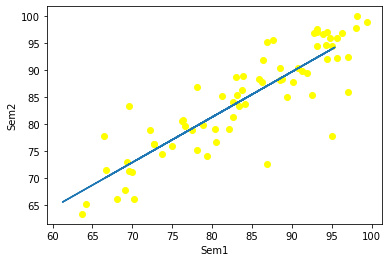

In [8]:
plt.scatter(x_train, y_train, color="yellow")

y_prediction = regr.predict(x_test)
plt.plot(x_test, y_prediction)

plt.xlabel("Sem1")
plt.ylabel("Sem2")
plt.plot

In [9]:
x_class = est_for_corr[['Sem1', 'Sem2']]
y_class = est_for_corr[['Sem3']]

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                    train_size=.8, test_size=.2) 

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_)
print(f"Train Score: {regr.score(x_train,y_train)*100}%")
print(f"Test Score: {regr.score(x_test,y_test)*100}%")

lr.intercept_: [-0.98147038]
lr.coef_: [[0.02240078 0.95789828]]
Train Score: 71.61382856471911%
Test Score: 66.3508647886834%


In [10]:
x_class = est_for_corr[['Sem2']]
y_class = est_for_corr[['Sem3']]

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                    train_size=.8, test_size=.2) 

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_)
print(f"Train Score: {regr.score(x_train,y_train)*100}%")
print(f"Test Score: {regr.score(x_test,y_test)*100}%")

lr.intercept_: [-1.31049701]
lr.coef_: [[0.98478629]]
Train Score: 69.4047804459535%
Test Score: 75.31917317652717%


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

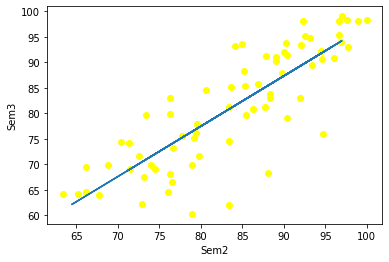

In [11]:
plt.scatter(x_train, y_train, color="yellow")

y_prediction = regr.predict(x_test)
plt.plot(x_test, y_prediction)

plt.xlabel("Sem2")
plt.ylabel("Sem3")
plt.plot

In [12]:
x_class = est_for_corr[['Sem1', 'Sem2', 'Sem3']]
y_class = est_for_corr[['Sem4']]

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                    train_size=.8, test_size=.2) 

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_)
print(f"Train Score: {regr.score(x_train,y_train)*100}%")
print(f"Test Score: {regr.score(x_test,y_test)*100}%")

lr.intercept_: [-5.8747488]
lr.coef_: [[-0.02352387  0.18218549  0.90246114]]
Train Score: 77.27642425237117%
Test Score: 61.55558764989444%


In [16]:
x_class = est_for_corr[['Sem3']]
y_class = est_for_corr[['Sem4']]

x_train, x_test, y_train, y_test = train_test_split(x_class, y_class, 
                                                    train_size=.8, test_size=.2) 

regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("lr.intercept_:", regr.intercept_) # b0
print("lr.coef_:", regr.coef_)
print(f"Train Score: {regr.score(x_train,y_train)*100}%")
print(f"Test Score: {regr.score(x_test,y_test)*100}%")

lr.intercept_: [-1.4905129]
lr.coef_: [[1.01289391]]
Train Score: 80.38508101763807%
Test Score: 45.8292560975323%
